In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import observefunc as obs
plt.rcParams.update({"font.size":20})



# Analyse NCDF

In [2]:
folder = "/home/peter/EasterIslands/Runs_22May/Standard/"
folders = [folder+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,6)]
datas = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]

# MAP

In [3]:
import pickle
import config
from pathlib import Path   # for creating a new directory
filename = "Map/EI_grid"+str(datas[0].gridpoints_y)+"_rad"+str(datas[0].r_T)+"+"+str(datas[0].r_F)+"+"+str(datas[0].r_M_later)
if Path(filename).is_file():
    with open(filename, "rb") as EIfile:
        config.EI = pickle.load(EIfile)

In [5]:
data = datas[0]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1, fc="gainsboro")
obs.observe(1400, fig=fig, ax=ax, specific_ag_to_follow=None, save=True, data = data, ncdf=True, folder=folder, posSize_small=False, legend=True, cbar=[True, True, True])
fig.tight_layout()


In [6]:
data = datas[2]
fig = plt.figure(figsize=(9*3,6*3))
gs = fig.add_gridspec(3,4,width_ratios=[18,18,18,1])
axes=[]
for a in range(3):
    for b in range(3):
        axes.append(fig.add_subplot(gs[a,b], fc="gainsboro"))
b1=plt.subplot(gs[0,3])
b2=plt.subplot(gs[1,3])
b3=plt.subplot(gs[2,3])

for n,t in enumerate([800,1100,1200,1300,1400,1500, 1600,1700,1800]):
    ax = axes[n]
    if t==1200:
        cbarax=b1
        cbar = [True, False, False]
    elif t==1500:
        cbarax=b2
        cbar = [False, True, False]
    elif t==1800:
        cbarax=b3
        cbar = [False, False, True]
    else:
        cbarax=None    
        cbar = [False, False, False]
    obs.observe(t, fig=fig, ax=ax, specific_ag_to_follow=None, save=False, data = data, ncdf=True, folder=folder, posSize_small=True, cbar=cbar, cbarax = cbarax)

#fig.tight_layout(wspace=0.2, hspace=0.2)
plt.subplots_adjust(
    left  = 0.05,  # the left side of the subplots of the figure
    right = 0.9  ,  # the right side of the subplots of the figure
    bottom = 0.05 ,  # the bottom of the subplots of the figure
    top = 0.95   ,  # the top of the subplots of the figure
    wspace = 0.01 ,  # the amount of width reserved for blank space between subplots
    hspace = 0.1 ,  # the amount of height reserved for white space between subplots
)
plt.savefig(folder+"Rull2020_Comparison_seed"+str(data.seed)+".pdf")
plt.close()



# Penalty

In [2]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import observefunc as obs
plt.rcParams.update({"font.size":18})

folder="/home/peter/EasterIslands/Code/Full_Model/Figs_May11_grid50/FullModel_grid50_repr7e-03_mv100_noRegrowth_highFix_seed101/"
data = xr.open_dataset(folder+"Statistics.ncdf")


In [3]:

import pickle
import config
from pathlib import Path   # for creating a new directory
filename = "Map/EI_grid"+str(data.gridpoints_y)+"_rad"+str(data.tree_search_radius)+"+"+str(data.agriculture_radius)+"+"+str(data.moving_radius_later)
if Path(filename).is_file():
    with open(filename, "rb") as EIfile:
        config.EI = pickle.load(EIfile)

In [1]:
with open(folder+"Penalties_AG0_t=0", "rb") as PenaltyFile:
    P = pickle.load(PenaltyFile)

NameError: name 'folder' is not defined

In [4]:
P

{'AG_nosettlement_zones': array([[1, 0, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 0, 1, ..., 1, 1, 1]], dtype=uint8),
 'AG_NewPos': [8.953252717299712, 11.706949041450443],
 'AG_Pos': [13.977024533957996, 3.3517709866666063],
 'AG_total_penalties': array([0.07113817, 0.        , 0.17870461, ..., 0.23019945, 0.21351907,
        0.23180742]),
 'AG_tree_penalty': array([7.58963731e-02, 1.50251340e-01, 7.91972791e-02, ...,
        5.27010694e-05, 6.13243455e-05, 6.10094444e-05]),
 'AG_map_penalty': array([0.01488977, 1.00678338, 0.09648206, ..., 0.17234778, 0.21645481,
        0.20871682]),
 'AG_index': 0,
 'AG_InitialTriangle': 1951,
 'AG_agriculture_penalty': array([0.05793342, 1.        , 0.00390648, ..., 0.50519857, 0.39067508,
        0.50126823]),
 'AG_MovingProb': array([1.55851298e-03, 0.00000000e+00, 1.81300998e-04, ...,
        6.47323908e-05, 9.03661158e-05, 6.26837524e-05]),
 'AG_pop': 25,
 'AG_pop_density_penalty': array([0

In [5]:
P['t']=800

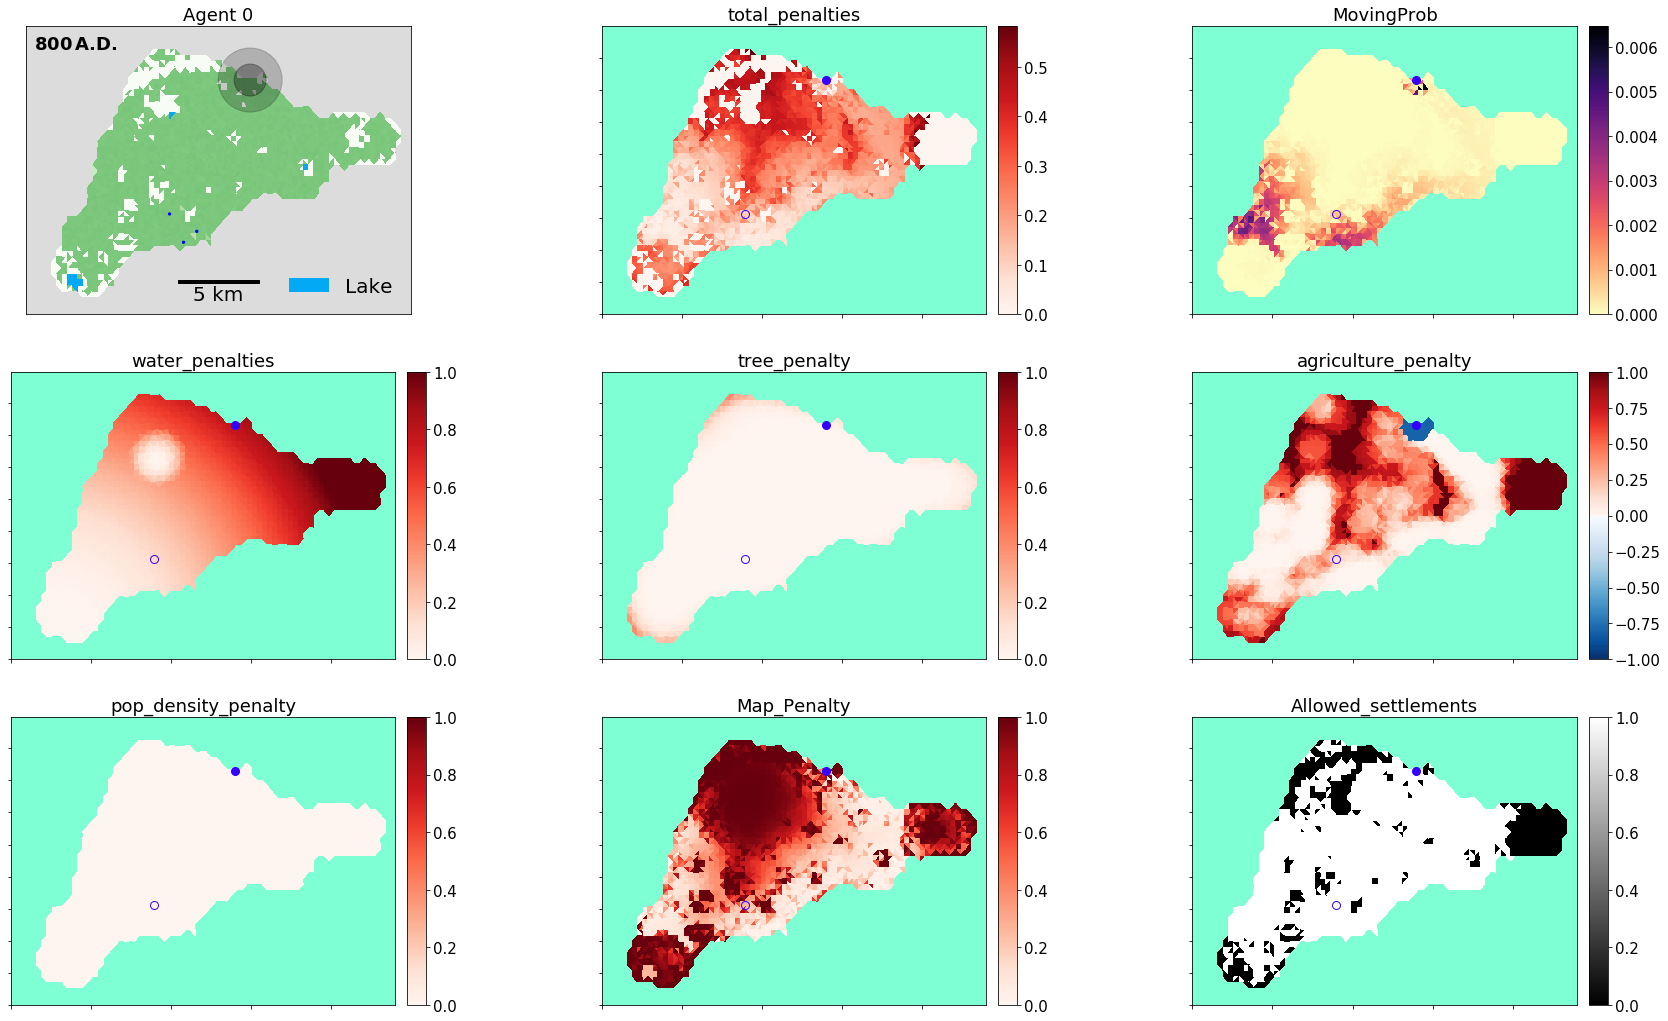

In [6]:
from observefunc import plot_movingProb
plot_movingProb(P, folder, data)

In [10]:
data.drought_RanoRaraku_1_start

800

In [6]:
def plot_fires_loc(data,folder):
    face_colors =data.tree_density.sel(time=800)*0
    time_arr = np.arange(800, 1901, step=100)
    for loc, size,time in zip(data.firesLoc, data.firesSize, data.firesTime):
        slot = np.where(time_arr<=time)[0][0]
        face_colors[loc] +=size
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111,fc="lightgray")
    firePlot = ax.tripcolor(config.EI.points_EI_km[:,0], config.EI.corners['upper_left'][1] - config.EI.points_EI_km[:,1], 
    config.EI.EI_triangles, facecolors=face_colors, vmin = 0, vmax = np.max(face_colors), cmap="Reds", alpha=1)

    watertriangles = np.zeros([config.EI.N_els])
    watertriangles[config.EI.water_triangle_inds]=1
    #watercmap =  LinearSegmentedColormap.from_list("watercmap",[(0,0,0,0),(127/255,1,212/255 ,1 )],N=2) # AQUAMARINE
    watercmap =  LinearSegmentedColormap.from_list("watercmap",[(0,0,0,0),(3/255,169/255,244/255 ,1 )],N=2) # Indigo blue
    _ = ax.tripcolor(config.EI.points_EI_km[:,0], config.EI.corners['upper_left'][1] - config.EI.points_EI_km[:,1], 
    config.EI.EI_triangles, facecolors=watertriangles, vmin = 0, vmax = 1, cmap=watercmap, alpha=None) 

    #for i in config.EI.water_midpoints:
    #    ax.plot([i[0]], [config.EI.corners['upper_left'][1]- i[1]], 'o',markersize=5, color="blue")
    
    ax.set_aspect('equal')
    divider = make_axes_locatable(plt.gca())
    if save:
        cax = divider.append_axes("right", "5%", pad="3%")
        cb1 = colorbar(treePlot, cax =cax) 
        cb1.set_label_text("Burnt trees in Triangle")
    return fig, ax, divider, firePlot

In [8]:
plot_fires_loc(data,folder)

NameError: name 'LinearSegmentedColormap' is not defined

In [8]:
def get_fires_in_t(t_0, t_1):
    fires_points=[]
    n=0
    while data.firesTime[n]<t_0:
        n+=1
    while data.firesTime[n]<t_1 and data.firesTime[n]>=t_0:
    #inds = np.where(data.firesTime==t)[0]
    #for n in inds:
        loc = config.EI.EI_midpoints[int(data.firesLoc[n])]
        fires_points.append([loc[0], loc[1], data.firesSize[n]])
        n+=1
    fires_points=np.array(fires_points)
    return fires_points


In [14]:
fires_points = get_fires_in_t(1100,1200)

(array([3., 2., 0., 1., 3., 2., 4., 4., 3., 5.]),
 array([ 64. , 103.9, 143.8, 183.7, 223.6, 263.5, 303.4, 343.3, 383.2,
        423.1, 463. ]),
 <a list of 10 Patch objects>)

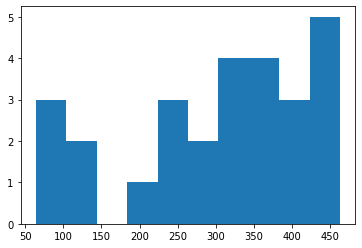

In [15]:
plt.hist(fires_points[:,2])

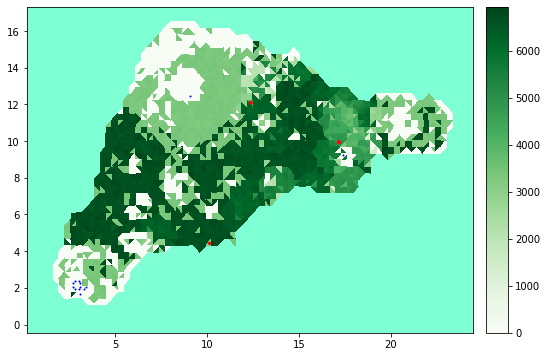

In [16]:
times_to_plot = np.arange(1200,1210,step=10)
for t in times_to_plot:
    fires_points = get_fires_in_t(t-10, t)
    config.EI.tree_density = data.tree_density.sel(time=t)
    fig, ax = config.EI.plot_TreeMap_and_hist()
    
    plot = ax.scatter(fires_points[:,0], config.EI.corners['upper_left'][1] - fires_points[:,1], s=10*fires_points[:,2]/max(fires_points[:,2]), color='red')


In [ ]:
times_to_plot = np.arange(1200,1210,step=10)

times_to_plot

In [45]:
fires_points

array([[ 15.79083688,   4.18971373, 229.        ],
       [ 15.79083688,   4.18971373, 228.        ],
       [ 15.79083688,   4.18971373, 213.        ],
       ...,
       [  5.33474219,  11.25237403, 127.        ],
       [  3.62762469,  11.97061067, 317.        ],
       [  3.73431953,  12.32972899, 381.        ]])

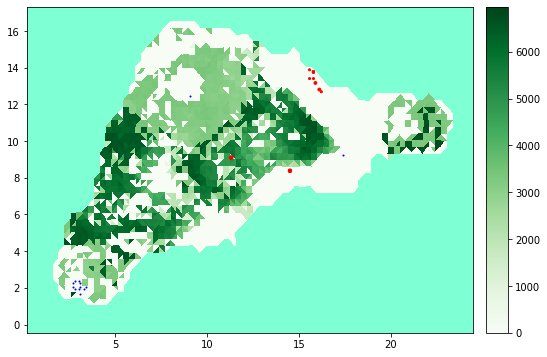

# GIF

In [4]:
import shutil
import imageio
from pathlib import Path
import pickle

In [8]:
data = datas[0]

def init():
    t=800
    print("Time: ",t, end=", ")
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1,1,1, fc="gainsboro")
    obs.observe(t, fig=fig, ax=ax, specific_ag_to_follow=None, save=False, data = data, ncdf=True, folder=folder, posSize_small=False, legend=True, cbar=[True, True, True])
    fig.tight_layout()
    plt.savefig("CreatingGif/CreatingGif"+str(t)+".png", bbox_inches="tight")
    plt.close()
    return fig, ax

def plot_map(t, save=True):
    print(t, end=", ")
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1,1,1, fc="gainsboro")
    obs.observe(t, fig=fig, ax=ax, specific_ag_to_follow=None, save=False, data = data, ncdf=True, folder=folder, posSize_small=False, legend=True, cbar=[True, True, True])
    fig.tight_layout()
    plt.savefig("CreatingGif/CreatingGif"+str(t)+".png", bbox_inches="tight")
    plt.close()
    return 



In [9]:
path = "CreatingGif"
Path(path).mkdir(parents=True, exist_ok=True)

#fig, ax = init()
times=np.arange(1871, 1901, step=1)
for t in times:
    plot_map(t)

images = []
filenames=["CreatingGif/CreatingGif"+str(t)+".png" for t in times]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(folder+'movie.gif', images, duration=0.4)

#shutil.rmtree(path)

#ani = animation.FuncAnimation(fig,plot_map, times, interval=1000)
#ani.save("Test.mp4", writer='imagemagick')
#plot_map(1000, save = False)

1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,

In [6]:
images = []
times=np.arange(800, 1901, step=1)
filenames=["CreatingGif/CreatingGif"+str(t)+".png" for t in times]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(folder+'movie_fast.gif', images, duration=0.02)